<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/svrt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Packages**

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from functools import partial

### **Question #2**

In [2]:
def cef(x):
  return 80_000 + x + 0.25*x**2

### **Question #3**

In [3]:
xs_true = jnp.linspace(80, 3000, 1000)

### **Question #4**

In [4]:
ys_true = jax.vmap(cef)(xs_true)

### **Question # 5**

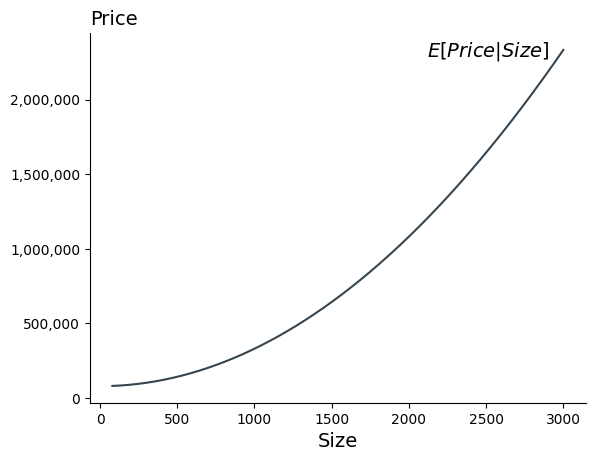

In [5]:
plt.plot(xs_true, ys_true, color="#36454F")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
ax.annotate(r'$E[Price | Size]$',
            xy = (0.68, 0.95),
            xycoords='axes fraction',
            ha='left',
            va='center',
            fontsize=14)
plt.show()

In [6]:
def Price(x, key):
  expected_price = cef(x)
  noise = jax.random.uniform(key, minval=-500_000, maxval=500_000)*(x/3000)
  return expected_price + noise

pop_size = 1_000_000
xs = jax.random.uniform(jax.random.PRNGKey(0), minval=80, maxval = 3000, shape=(pop_size,))
keys = jax.random.split(jax.random.PRNGKey(0), pop_size)
ys = jax.vmap(Price)(xs, keys)

### **Question #6**

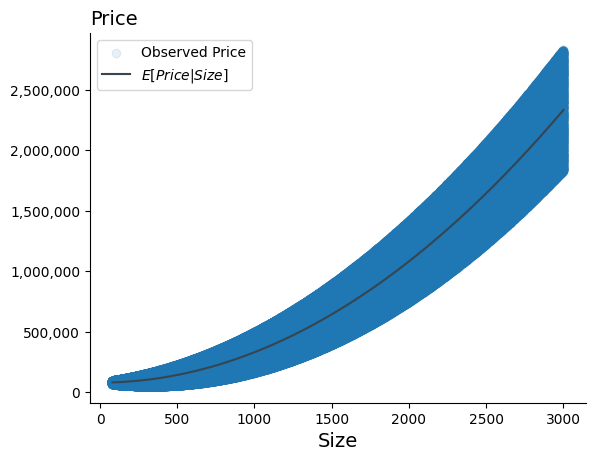

In [7]:
plt.scatter(xs, ys, alpha=0.1, label='Observed Price')
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

### **Question # 7**

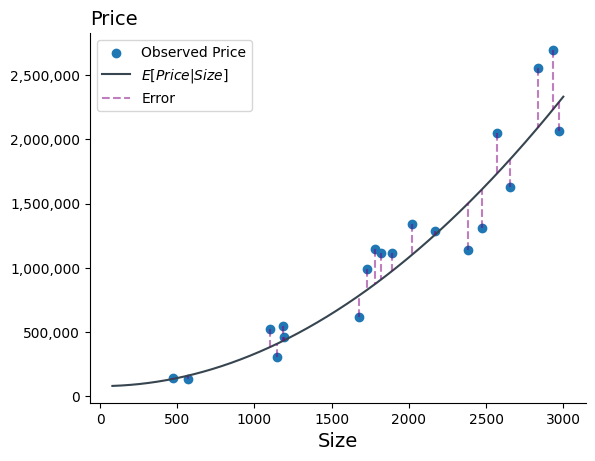

In [8]:
xs_mini = xs[:20]
ys_mini = ys[:20]


# Scatter plot of points
plt.scatter(xs_mini, ys_mini, label='Observed Price')

# Plot of true relationship line
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$')

for i, (x, y) in enumerate(zip(xs_mini, ys_mini)):
    if i == 0:
      plt.plot([x, x], [y, cef(x)], color="purple", linestyle="--", alpha=0.5, label='Error')
    else:
      plt.plot([x, x], [y, cef(x)], color="purple", linestyle="--", alpha=0.5)  # Connect observed to true point


# Customize axes and appearance
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Label and title
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

### **Question #8**

In [9]:
df = pd.DataFrame({'price': ys, 'size': xs}) # Creates DataFrame from arrays
linear_model = smf.ols('price ~ size', data=df)

### **Question #9**

In [10]:
results = linear_model.fit()

### **Question #10**

In [11]:
def model(x):
	return results.params.values[0] + results.params.values[1]*x

### **Question #11**

In [12]:
xs_linear = jnp.linspace(80, 3000, 1000)
ys_linear = jax.vmap(model)(xs_linear)

### **Question #12**

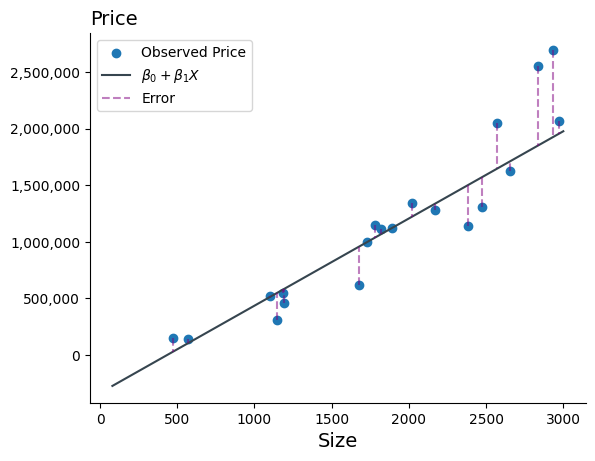

In [13]:
xs_mini = xs[:20]
ys_mini = ys[:20]


# Scatter plot of points
plt.scatter(xs_mini, ys_mini, label='Observed Price')

# Plot of true relationship line
plt.plot(xs_linear, ys_linear, color="#36454F", label=r'$\beta_0 + \beta_1X$')

for i, (x, y) in enumerate(zip(xs_mini, ys_mini)):
    if i == 0:
      plt.plot([x, x], [y, model(x)], color="purple", linestyle="--", alpha=0.5, label='Error')
    else:
      plt.plot([x, x], [y, model(x)], color="purple", linestyle="--", alpha=0.5)  # Connect observed to true point


# Customize axes and appearance
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Label and title
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

### **Question #13**

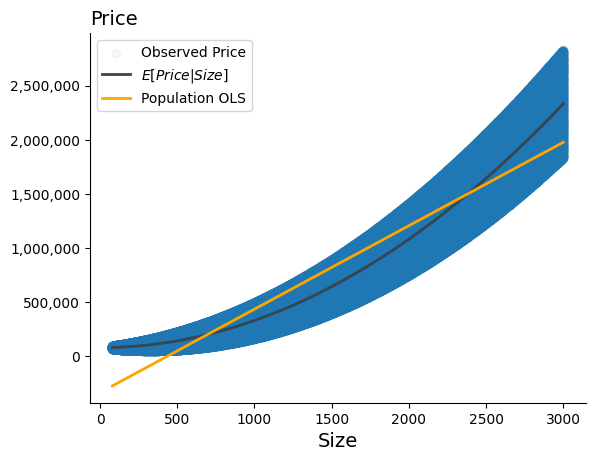

In [14]:
plt.scatter(xs, ys, alpha=0.05, label='Observed Price')
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$', linewidth=2)
plt.plot(xs_linear, ys_linear, color='orange', linewidth=2, label='Population OLS')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

### **Question #14**

In [15]:
sample_df = df.sample(n=250, random_state=42)

### **Question #15**

In [16]:
linear_model = smf.ols('price ~ size', data=sample_df)
results1 = linear_model.fit()

### **Question #16**

In [19]:
def sample_model(x):
	return results1.params.values[0] + results1.params.values[1]*x

### **Question #17**

In [20]:
xs_sample = jnp.linspace(80, 3000, 1000)
ys_sample = jax.vmap(sample_model)(xs_sample)

### **Question #18**

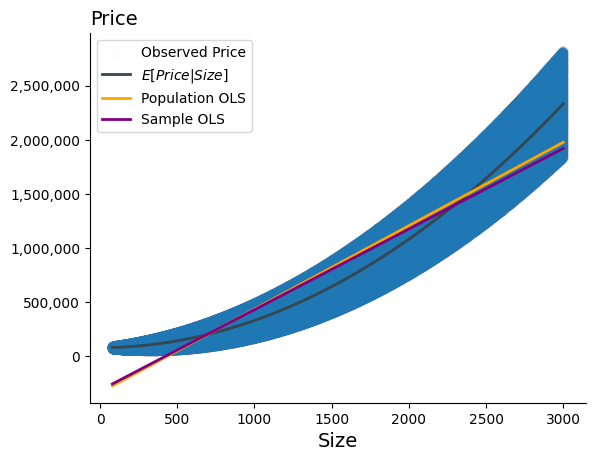

In [21]:
plt.scatter(xs, ys, alpha=0.01, label='Observed Price')
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$', linewidth=2)
plt.plot(xs_linear, ys_linear, color='orange', linewidth=2, label='Population OLS')
plt.plot(xs_sample, ys_sample, color='purple', linewidth=2, label='Sample OLS')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

### **Question #19**

In [22]:
y_first, x_first = df.loc[0].values

y_cef = cef(x_first)
cef_error_first = y_first - y_cef

y_hat_pop = model(x_first)
pop_error_first = y_first - y_hat_pop

y_hat_sample = sample_model(x_first)
sample_error_first =  y_first - y_hat_sample

print(f'CEF Prediction Error of first Observation: {cef_error_first:.0f}')
print(f'Pop Prediction Error of first Observation: {pop_error_first:.0f}')
print(f'Sample Prediction Error of first Observation: {sample_error_first:.0f}')

CEF Prediction Error of first Observation: 464040
Pop Prediction Error of first Observation: 771025
Sample Prediction Error of first Observation: 825966


### **Question #20**

In [25]:
models = [cef, model, sample_model]
model_names = ['CEF', 'Pop Linear Model', 'Sample Linear Model']

for model, model_name in zip(models, model_names):
  y_hat = model(x_first)
  prediction_error = y_first - y_hat
  print(f"{model_name} prediction error: {prediction_error:.0f}")

CEF prediction error: 464040
Pop Linear Model prediction error: 825966
Sample Linear Model prediction error: 825966


### **Question #21**

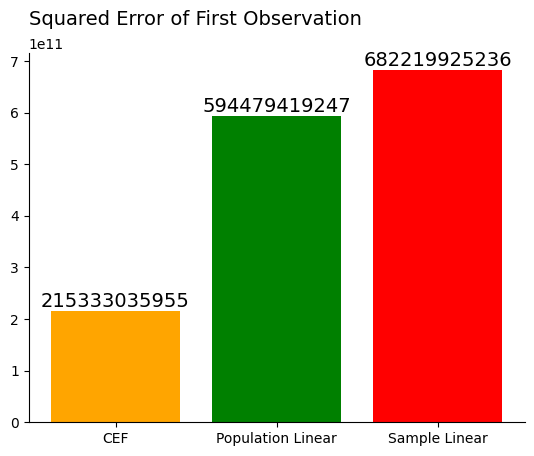

In [26]:
sqr_prection_error = [cef_error_first**2, pop_error_first**2, sample_error_first**2]
model_names = ['CEF', 'Population Linear', 'Sample Linear']

# Create the bar plot
plt.bar(model_names, sqr_prection_error, color=['orange', 'green', 'red'])

# Displaying exact MSE values on top of each bar
for i, v in enumerate(sqr_prection_error):
    plt.text(i, v + 10, f"{v:.0f}", ha='center', va='bottom', fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Squared Error of First Observation', loc='left', size=14, pad=20)
plt.show()

### **Question #22**

In [28]:
def mse(f, df):
  xs, ys = df['size'].values, df['price'].values
  prediction = jax.vmap(f)(xs)
  error = ys-prediction
  sqr_error = error**2
  mse = jnp.mean(sqr_error)
  return mse

### **Question #23**

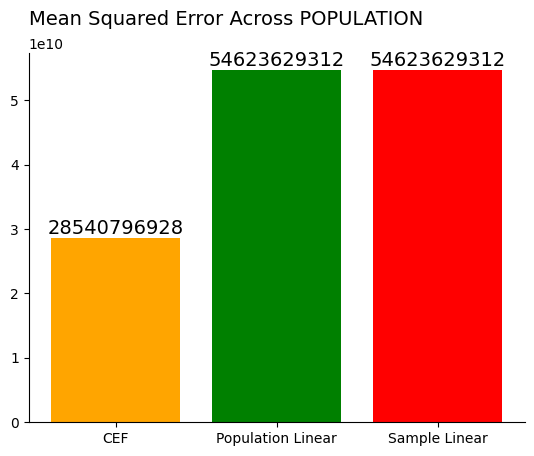

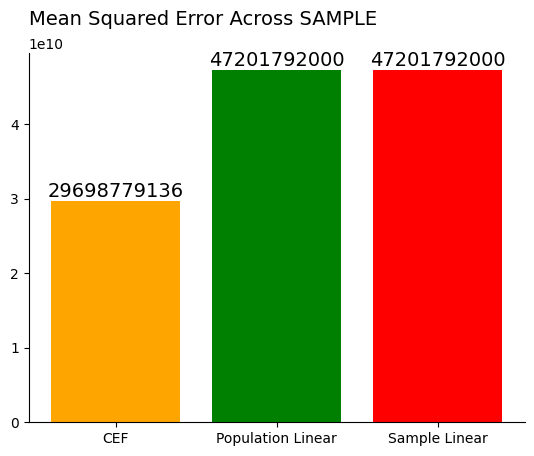

In [29]:
sqr_prection_error = [mse(cef, df), mse(model, df), mse(sample_model, df)]
model_names = ['CEF', 'Population Linear', 'Sample Linear']

# Create the bar plot
plt.bar(model_names, sqr_prection_error, color=['orange', 'green', 'red'])

# Displaying exact MSE values on top of each bar
for i, v in enumerate(sqr_prection_error):
    plt.text(i, v + 10, f"{v:.0f}", ha='center', va='bottom', fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Mean Squared Error Across POPULATION', loc='left', size=14, pad=20)
plt.show()

sqr_prection_error = [mse(cef, sample_df), mse(model, sample_df), mse(sample_model, sample_df)]
model_names = ['CEF', 'Population Linear', 'Sample Linear']

# Create the bar plot
plt.bar(model_names, sqr_prection_error, color=['orange', 'green', 'red'])

# Displaying exact MSE values on top of each bar
for i, v in enumerate(sqr_prection_error):
    plt.text(i, v + 10, f"{v:.0f}", ha='center', va='bottom', fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Mean Squared Error Across SAMPLE', loc='left', size=14, pad=20)
plt.show()

### **Question #24**

In [32]:
predicted_var = ((results.fittedvalues- results.fittedvalues.mean())**2).mean()

### **Question #25**

In [35]:
observed_var = ((df['price'] - df['price'].mean())**2).mean()
r2 = predicted_var / observed_var
print(r2)
print(results.rsquared)

0.8870771800254079
0.8870771733118599
